In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [33]:
train = pd.read_csv('data/emnist-balanced-train.csv', header=None)
test  = pd.read_csv("data/emnist-balanced-test.csv", header=None)

In [4]:
mapping = pd.read_csv('data/emnist-balanced-mapping.txt', sep = " ", header = None)

In [5]:
converted = mapping[0]
actual = mapping[1]

In [6]:
mapp = {}

In [7]:
for i, j in zip(converted, actual):
    mapp[i] = j

In [8]:
chr(mapp[3])

'3'

In [10]:
frames = [train, test]

train = pd.concat(frames)

In [34]:
test_y = test.iloc[:, 0]
test_x = test.iloc[:, 1:]

In [35]:
num_classes = 47
test_y = np_utils.to_categorical(test_y, num_classes)

In [36]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
test_x = np.apply_along_axis(rotate, 1, test_x)/255

# Visualizing some shit

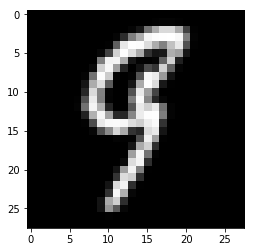

In [14]:
plt.imshow(train_x[689].reshape(28,28), cmap='gray')
plt.show()

In [16]:
chr(mapp[train_y[689].argmax()])

'9'

In [17]:
inp = Input(shape=(784,))
h1 = Dense(1024, activation='relu')(inp)
d1 = Dropout(0.2)(h1)
h2 = Dense(1024, activation='relu')(d1)
d2 = Dropout(0.2)(h2)
out = Dense(num_classes, activation='softmax')(d2) 
model = Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy
checkpointer = ModelCheckpoint('model-emnist-nn.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [18]:
history=model.fit(train_x, train_y, # Train the model using the training set...
          batch_size=512, nb_epoch=50,
          verbose=1, validation_split=0.1,callbacks=[earlystopper,checkpointer]) # ...holding out 10% of the data for validation

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 118440 samples, validate on 13160 samples
Epoch 1/50
118272/118440 [============================>.] - ETA: 0s - loss: 1.0558 - acc: 0.6903
Epoch 00001: val_loss improved from inf to 0.63587, saving model to model-emnist-nn.h5
118440/118440 [==============================] - 32s 269us/step - loss: 1.0554 - acc: 0.6904 - val_loss: 0.6359 - val_acc: 0.8027
Epoch 2/50
118272/118440 [============================>.] - ETA: 0s - loss: 0.5736 - acc: 0.8112
Epoch 00002: val_loss improved from 0.63587 to 0.51945, saving model to model-emnist-nn.h5
118440/118440 [==============================] - 37s 315us/step - loss: 0.5733 - acc: 0.8113 - val_loss: 0.5194 - val_acc: 0.8273
Epoch 3/50
118272/118440 [============================>.] - ETA: 0s - loss: 0.4766 - acc: 0.8382
Epoch 00003: val_loss improved from 0.51945 to 0.47504, saving model to model-emnist-nn.h5
118440/118440 [==============================] - 37s 315us/step - loss: 0.4765 - acc: 0.8381 - val_loss: 0.4750 - val_acc: 0.8420

In [19]:
model.evaluate(train_x, train_y, verbose=1)

131600/131600 [==============================] - 18s 138us/step


[0.1906421945513563, 0.9275835866261398]

In [20]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [37]:
from keras.models import model_from_json

In [38]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [39]:
loaded_model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy'])

In [31]:
test_y = test.iloc[:, 0]
test_x = test.iloc[:, 1:]

In [40]:
loaded_model.evaluate(test_x, test_y, verbose=1)

18800/18800 [==============================] - 3s 151us/step


[0.36413293744972414, 0.8838297872340426]

In [41]:
import matplotlib.pyplot as plt
import cv2

In [42]:
img = cv2.imread('testes.png')

In [43]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

newimg = cv2.resize(img_gray,(int(28),int(28)))

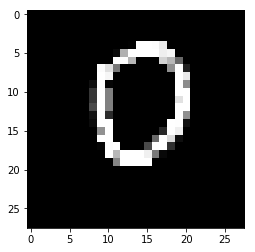

In [44]:
plt.imshow(newimg, cmap='gray')

In [45]:
flattened = newimg.reshape(-1)

In [46]:
dick = loaded_model.predict(flattened.reshape(1,784)).argmax()

chr(mapp[dick])

'P'

In [47]:
dick

25